<a href="https://colab.research.google.com/github/Ajay-Sai-Kiran/GANS/blob/main/Day_2_Architecture_structure_basics_of_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Architecture structure basics

A generative adversarial network (GAN) has two parts:

**The generator** learns to generate plausible data. The generated instances become negative training examples for the discriminator.

**The discriminator** learns to distinguish the generator's fake data from real data. The discriminator penalizes the generator for producing implausible results.

When training begins, the generator produces obviously fake data, and the discriminator quickly learns to tell that it's fake:

As training progresses, the generator gets closer to producing output that can fool the discriminator:

Finally, if generator training goes well, the discriminator gets worse at telling the difference between real and fake. It starts to classify fake data as real, and its accuracy decreases.

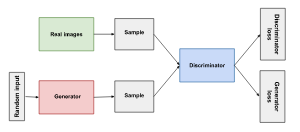

Both the generator and the discriminator are neural networks. 

The generator output is connected directly to the discriminator input. Through backpropagation, the discriminator's classification provides a signal that the generator uses to update its weights.

#The Discriminator

The discriminator in a GAN is simply a classifier. It tries to distinguish real data from the data created by the generator. It could use any network architecture appropriate to the type of data it's classifying.

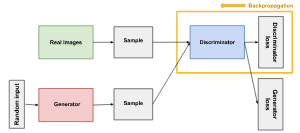

Discriminator Training Data
The discriminator's training data comes from two sources:

**Real data instances**, such as **real pictures of people**. The discriminator uses these instances as positive examples during training.


**Fake data instances** **created by the generator**. The discriminator uses these instances as negative examples during training.

In the above figure the two "Sample" boxes represent these two data sources feeding into the discriminator. 

During discriminator training the generator does not train. Its weights remain constant while it produces examples for the discriminator to train on.

#Training the Discriminator

The discriminator connects to two loss functions. During discriminator training, the discriminator ignores the generator loss and just uses the discriminator loss. We use the generator loss during generator training.

During discriminator training:

    The discriminator classifies both real data and fake data from the generator.

    The discriminator loss penalizes the discriminator for misclassifying a real instance as fake or a fake instance as real.

    The discriminator updates its weights through backpropagation from the discriminator loss through the discriminator network.

#The Generator

The **generator part of a GAN learns to create fake data by incorporating feedback from the discriminator**. It learns to make the discriminator classify its output as real.


```



Generator training requires tighter integration between the generator and the discriminator than discriminator training requires. The portion of the GAN that trains the generator includes:

    random input

    generator network, which transforms the random input into a data instance

    discriminator network, which classifies the generated data

    discriminator output

    generator loss, which penalizes the generator for failing to fool the discriminator

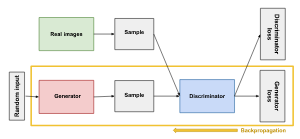

#Random Input


Neural networks need some form of input. Normally we input data that we want to do something with, like an instance that we want to classify or make a prediction about. But what do we use as input for a network that outputs entirely new data instances?

In its most basic form, a GAN takes random noise as its input. The generator then transforms this noise into a meaningful output. By introducing noise, we can get the GAN to produce a wide variety of data, sampling from different places in the target distribution

#Using the Discriminator to Train the Generator

To train a neural net, we alter the net's weights to reduce the error or loss of its output. In our GAN, however, the generator is not directly connected to the loss that we're trying to affect. The generator feeds into the discriminator net, and the discriminator produces the output we're trying to affect. The generator loss penalizes the generator for producing a sample that the discriminator network classifies as fake.

This extra chunk of network must be included in backpropagation. Backpropagation adjusts each weight in the right direction by calculating the weight's impact on the output — how the output would change if you changed the weight. But the impact of a generator weight depends on the impact of the discriminator weights it feeds into. So backpropagation starts at the output and flows back through the discriminator into the generator.

At the same time, we don't want the discriminator to change during generator training. Trying to hit a moving target would make a hard problem even harder for the generator.

So we train the generator with the following procedure:

    Sample random noise.

    Produce generator output from sampled random noise.

    Get discriminator "Real" or "Fake" classification for generator output.

    Calculate loss from discriminator classification.

    Backpropagate through both the discriminator and generator to obtain gradients.

    Use gradients to change only the generator weights.

#Credits: Google Developers